In [1]:
import keras,os
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'C://Users//Shalini//Desktop//archive//train'
test_path = 'C://Users//Shalini//Desktop//archive//test'

Working with 2286 images
Image examples: 
9001695L.png


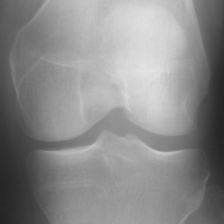

9001897L.png


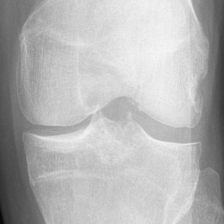

9003126L.png


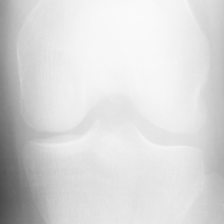

9003126R.png


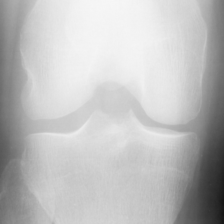

9003430L.png


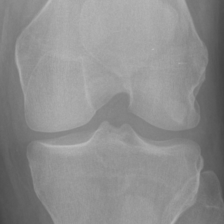

In [4]:
from PIL import Image 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/0'


onlyzerofiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyzerofiles)))
print("Image examples: ")


for i in range(5):
    print(onlyzerofiles[i])
    display(_Imgdis(filename=folder + "/" + onlyzerofiles[i], width=240, height=240))
     

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [8]:
folders = glob('C://Users//Shalini//Desktop//archive//train//*')
print(len(folders))

5


In [9]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5778 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1656 images belonging to 5 classes.


In [17]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

C:\Users\Shalini\AppData\Local\Temp\ipykernel_18412\1204140518.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/20

Epoch 1: val_loss improved from inf to 1.39663, saving model to mymodel.h5
5/5 - 155s - loss: 1.2663 - accuracy: 0.3938 - val_loss: 1.3966 - val_accuracy: 0.3428 - 155s/epoch - 31s/step
Epoch 2/20

Epoch 2: val_loss improved from 1.39663 to 1.27083, saving model to mymodel.h5
5/5 - 163s - loss: 1.2628 - accuracy: 0.3125 - val_loss: 1.2708 - val_accuracy: 0.3350 - 163s/epoch - 33s/step
Epoch 3/20

Epoch 3: val_loss did not improve from 1.27083
5/5 - 162s - loss: 1.3256 - accuracy: 0.3688 - val_loss: 1.2810 - val_accuracy: 0.4014 - 162s/epoch - 32s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 1.27083
5/5 - 161s - loss: 1.3136 - accuracy: 0.3125 - val_loss: 1.3650 - val_accuracy: 0.3174 - 161s/epoch - 32s/step
Epoch 5/20

Epoch 5: val_loss improved from 1.27083 to 1.21653, saving model to mymodel.h5
5/5 - 187s - loss: 1.3542 - accuracy: 0.3812 - val_loss: 1.2165 - val_accuracy: 0.3896 - 187s/epoch - 37s/step
Epoch 6/20

Epoch 6: val_loss did not improve from 1.21653

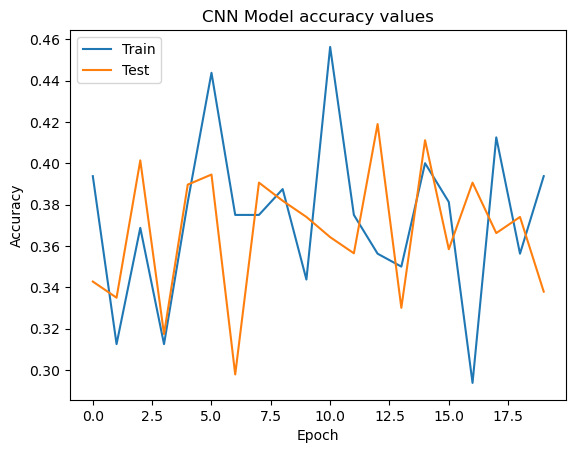

In [18]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 172ms/step
Definite presence of osteophytes and possible joint space narrowing


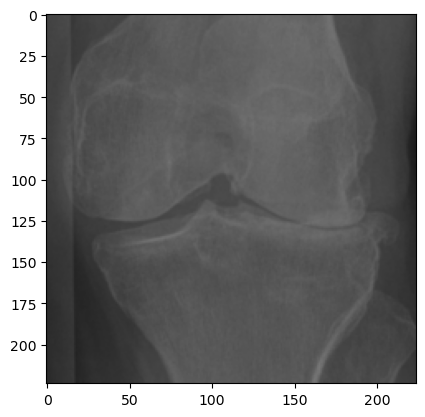

In [37]:
from keras.preprocessing import image
img = image.load_img("C:\\Users\\Shalini\\Desktop\\archive\\image.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)

if max(output[0]) == output[0][0]:
    print("Healthy knee")
elif max(output[0]) == output[0][1]:
    print("Doubtful joint narrowing with possible osteophytic lipping")
elif max(output[0]) == output[0][2]:
    print("Definite presence of osteophytes and possible joint space narrowing")
elif max(output[0]) == output[0][3]:
    print("Multiple osteophytes, definite joint space narrowing, with mild sclerosis.")
elif max(output[0]) == output[0][4]:
    print("Large osteophytes, significant joint narrowing, and severe sclerosis.")